### Problem statement.
Social network analysis is an example of a widely faced issue in data science industry. eg. paper citations. 
(in case there is a problem with getting the dataset, feel free to change the scenario to US government choosing potential immigrants to their country based on their social media authencity. We figured out a way to do that) : https://www.nytimes.com/2019/06/02/us/us-visa-application-social-media.html
Below we study a method to perform graphical network analysis and use them to create features for our learning. 

Dataset : http://snap.stanford.edu/data/ego-Facebook.html

* say you are in the recruiting team of a company. and your company needs to hire data scientists.
* Now since there are a lot of applicants, instead of going through their resumes (since all of the look the same anyway ;)), you plan on using their coorporate social media profile for finding the most "renowned" data scientists for your company. 
* Now, assume that luckily you also have data from linkedin with their connections and recommendations etc and you plan on doing some social network analysis. -- no data
-----------------------------------------------------------------------------------------------
##### Note : We will be using graph-tool for the demo. But you can feel free to use networkx (or any other tool) for graphical analysis
* check A8 for notes on introduction. 
* Create 4000 records atleast (70% training 30% test)
* Add noise to the data
* remove columns of connections

### Task 1:
Find the betweenness centrality for each connection.
    ----- Include the story behind using betweeness centrality. Save the image created (as A.png, will be used for submission later)
    ----- Show them in a graphical format. (check how to make a graphical structure from networkx package.)
    ----- include the code snippet that does the calculation if required using the networkx pkg

In [3]:
from networkx import *
import os
import pandas as pd
import matplotlib.pyplot as plt
#from graph_tool.all import *

source = "data/facebook/" #try reading from gzip file

# Reading all *.edges files in dataframes.  
files = [f for f in os.listdir(source) if f.endswith(".edges")]
fs = files[:2] # remove this later just for testing. 
df = pd.DataFrame()
for f in fs:
    with open(source+f,'r') as fopen:
        temp = pd.read_csv(fopen,sep=" ",header=None)
        fopen.close()
        df = pd.concat([temp,df])
df.head(10)

,0,1
0,953,1323
1,1789,1707
2,1175,1059
3,1329,1559
4,1804,1898
5,1622,1520
6,1200,1202
7,1449,1836
8,1156,1605
9,1149,1559


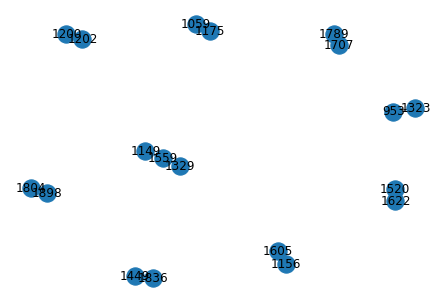

In [4]:
g= Graph(directed=True)
for i,rows in df.head(10).iterrows():
    g.add_edge(rows[0],rows[1])
draw(g, with_labels=True)

https://www.geeksforgeeks.org/betweenness-centrality-centrality-measure/

In [17]:
###### WRITE UR CODE HERE ############
def get_betweenness_centrality(G):
    """Compute the shortest-path betweenness centrality for nodes. 
    Args 
    ---------- 
    G : graph 
      A NetworkX graph. 
      
    normalized : bool, optional 
      If True the betweenness values are normalized by `2/((n-1)(n-2))` 
      for graphs, and `1/((n-1)(n-2))` for directed graphs where `n` 
      is the number of nodes in G. 
  
    weight : None or string, optional (default=None) 
      If None, all edge weights are considered equal. 
      Otherwise holds the name of the edge attribute used as weight. 
  
    endpoints : bool, optional 
      If True include the endpoints in the shortest path counts. 
  
    Returns 
    ------- 
    nodes : dictionary 
       Dictionary of nodes with betweenness centrality as the value.       
    """
    nodes = G.nodes()
    for s in nodes: 
        P = single_source_dijkstra_path(G, s, 1) 
        betweenness = accumulate_basic(betweenness, S, P, sigma, s) 

    betweenness = _rescale(betweenness, len(G), directed=G.is_directed()) 
    return betweenness
b = get_betweenness_centrality(g)
for i in b.keys():
    print("{} {}".format(i,b[i]))

NameError: name 'accumulate_basic' is not defined

In [16]:
def betweenness_centrality(G, k=None, normalized=True, weight=None, 
                           endpoints=False, seed=None): 
    betweenness = dict.fromkeys(G, 0.0)  # b[v]=0 for v in G 
    if k is None: 
        nodes = G 
    else: 
        random.seed(seed) 
        nodes = random.sample(G.nodes(), k) 
    for s in nodes: 
  
        # single source shortest paths 
        if weight is None:  # use BFS 
            S, P, sigma = _single_source_shortest_path_basic(G, s) 
        else:  # use Dijkstra's algorithm 
            S, P, sigma = _single_source_dijkstra_path_basic(G, s, weight) 
  
        # accumulation 
        if endpoints: 
            betweenness = _accumulate_endpoints(betweenness, S, P, sigma, s) 
        else: 
            betweenness = _accumulate_basic(betweenness, S, P, sigma, s) 
  
    # rescaling 
    betweenness = _rescale(betweenness, len(G), normalized=normalized, 
                           directed=G.is_directed(), k=k) 
    return betweenness 

NameError: name '_single_source_shortest_path_basic' is not defined

In [10]:
### Find betweenness centrality
#bet = betweenness_centrality(g)
#for i in bet.keys():
    #print("{} {}".format(i,bet[i]))
    
### Find degree centrality    
#deg = degree_centrality(g)
#for i in deg.keys():
    #print("{} {}".format(i,deg[i]))

### Find eigen centrality    
eig = eigenvector_centrality(g)
for i in eig.keys():
    print("{} {}".format(i,eig[i]))

953 5.006181057877139e-06
1323 5.006181057877139e-06
1789 5.006181057877139e-06
1707 5.006181057877139e-06
1175 5.006181057877139e-06
1059 5.006181057877139e-06
1329 0.4999999998997524
1559 0.707106781044776
1804 5.006181057877139e-06
1898 5.006181057877139e-06
1622 5.006181057877139e-06
1520 5.006181057877139e-06
1200 5.006181057877139e-06
1202 5.006181057877139e-06
1449 5.006181057877139e-06
1836 5.006181057877139e-06
1156 5.006181057877139e-06
1605 5.006181057877139e-06
1149 0.4999999998997524


In [ ]:
def create_graph():
    ''' Write code to create the graph from df
    '''
    g= Graph(directed=False) #Use for graphtool
    

### Task 2:
Find the eighenvector centrality for each connection. 
    -----  Include the story behind using eighenvector centrality. Save the image created (as B.png, will be used for submission later)
    ----- Show them in a graphical format. (check how to make a graphical structure from networkx package.) 
    ----- include the code snippet that does the calculation if required using the networkx pkg

### Task 3:
Now as a part of this step, we expect you to use the above two created fields and use it one by one (along with original fields in the dataset) to train any of the three machine learning models (we studied) based on ones you think will be suitable for the problem set and compare the results. Based on the results obtained. Answer the questions below and submit the answer file as answer.txt. Remember to not exceed more than 3 sentences for each question.

Hint: https://spark.apache.org/docs/latest/ml-tuning.html
https://rawgit.com/sfu-db/bigdata-cmpt733/master/Assignments/A5/A5.html

### Task 4 :
   * q1) Which 3 models did you choose and why? Explain reasons behind chosing these 3 ML models.
   * q2) Compare the performance of these three models and explain. Why do you think you get such results. 
   * q3) What is the evaluation method you used?
   * q4) Do you think adding the inferential feature vectors (Betweeness and eighenvector) for centrality was a good idea and why? Can you think of a different approach for solving this problem (other than Social Network Graphical analysis)

Submit all the files in a zipped format under Coursys.

### Dataset Locations (potential links) :-
* https://github.com/awesomedata/awesome-public-datasets
  * https://github.com/awesomedata/awesome-public-datasets#complexnetworks
  * https://github.com/awesomedata/awesome-public-datasets#socialnetworks
  * https://github.com/awesomedata/awesome-public-datasets#searchengines
  * http://www-personal.umich.edu/~mejn/netdata/
  * https://www.kdnuggets.com/2014/08/interesting-social-media-datasets.html+
  * google keyword (awesome public datasets social network)
  * http://snap.stanford.edu/data/